# 911 Emergency Calls Data Analysis

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_csv("911.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [29]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 zipcodes to receive maximum 911 emergency calls

In [30]:
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Top 5 townships to receive maximum 911 calls : Lower Merion, Abington, Norristown, Upper Merion, Cheltenham

In [31]:
df["title"].nunique()
# len(df["title"].unique())

110

110 types of emergency cases

In [32]:
df["title"][:5]

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [0]:
def getReason(reason):
  return reason.split(":")[0]

In [34]:
getReason(df["title"][0])

'EMS'

In [0]:
df["reason"] = df["title"].apply(getReason)
# df["reason"] = df["title"].apply(lambda x: x.split(":")[0])
# In-place operation

### Cause of maximum calls

Finding main departments in charge of the calls:  
*   EMS (emergency medical services)  
*   Fire   
*   Traffic

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [37]:
df["reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

Most common reason for 911 calls is EMS.

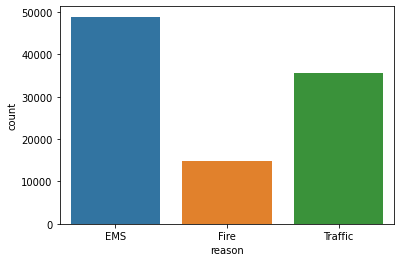

In [38]:
sns.countplot(df["reason"]) # Only need to pass the column, it counts by itself, don't need to pass count
# sns.countplot(x='reason', data = df) also correct
# Takes X axis as the index of the series (since df["reason"] gives series) automatically

In [39]:
df[df["reason"]=="Traffic"]["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             23066
Traffic: DISABLED VEHICLE -              7702
Traffic: ROAD OBSTRUCTION -              3144
Traffic: HAZARDOUS ROAD CONDITIONS -     1086
Traffic: VEHICLE FIRE -                   553
Traffic: VEHICLE LEAKING FUEL -            77
Traffic: DEBRIS/FLUIDS ON HIGHWAY -        67
Name: title, dtype: int64

Shows all kinds of traffic emergencies, calls were made for.  
Maximum cases are those of vehicle accidents, followed by disabled vehicle, road obstruction and risky road conditions.

In [40]:
df[df["reason"]=="EMS"]["title"].value_counts()[:10]

EMS: RESPIRATORY EMERGENCY        5112
EMS: CARDIAC EMERGENCY            5012
EMS: FALL VICTIM                  4863
EMS: VEHICLE ACCIDENT             3935
EMS: SUBJECT IN PAIN              2687
EMS: HEAD INJURY                  2631
EMS: UNKNOWN MEDICAL EMERGENCY    1873
EMS: SYNCOPAL EPISODE             1717
EMS: SEIZURES                     1630
EMS: GENERAL WEAKNESS             1464
Name: title, dtype: int64

Top reasons for EMS calls: Respiratory emergency, cardiac emergency, fall victim, vehicle accident, subject in pain, head injury

In [41]:
df[df["reason"]=="Fire"]["title"].value_counts()[:10]

Fire: FIRE ALARM                  5496
Fire: VEHICLE ACCIDENT            1638
Fire: FIRE INVESTIGATION          1460
Fire: GAS-ODOR/LEAK               1028
Fire: BUILDING FIRE                807
Fire: FIRE SPECIAL SERVICE         666
Fire: ELECTRICAL FIRE OUTSIDE      622
Fire: CARBON MONOXIDE DETECTOR     575
Fire: VEHICLE FIRE                 516
Fire: WOODS/FIELD FIRE             514
Name: title, dtype: int64

### Time-analysis of calls

In [42]:
type(df["timeStamp"].iloc[1])
# extract first row of the series
# Not df["timeStamp"].dtype

str

In [0]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

Convert time from string to timestamp

In [44]:
type(df["timeStamp"].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

Split to 3 columns - hour, month, day of week

In [0]:
time = df["timeStamp"].iloc[0]

In [46]:
print("Day of week", time.dayofweek)
print("Hour",time.hour)
print("Month", time.month)

Day of week 3
Hour 17
Month 12


In [0]:
dayOfWeek = df["timeStamp"].apply(lambda x: x.dayofweek)
hour = df["timeStamp"].apply(lambda x: x.hour)
month = df["timeStamp"].apply(lambda x: x.month)

In [48]:
dayOfWeek

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: timeStamp, Length: 99492, dtype: int64

In [0]:
def convert(x):

  days = dict()
  days = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
  return days[x]
  
  # if(x==0):
  #   return "Mon"
  # elif(x==1):
  #   return "Tue"
  # elif(x==2):
  #   return "Wed"
  # elif(x==3):
  #   return "Thu"
  # elif(x==4):
  #   return "Fri"
  # elif(x==5):
  #   return "Sat"
  # else:
  #   return "Sun"
    
dayOfWeek = pd.Series(map(convert, dayOfWeek))

In [50]:
dayOfWeek

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Length: 99492, dtype: object

In [0]:
df["dayOfWeek"] = dayOfWeek
df["month"] = month
df["hour"] = hour

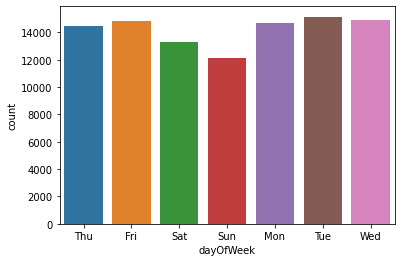

In [52]:
sns.countplot(x = "dayOfWeek", data = df)

Minimum cases on Sunday. Saturday has fewer cases too. Thus the number of emergency calls are less on weekends.  
All other days have more or less the same number of calls.

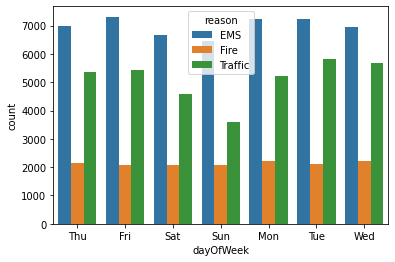

In [53]:
sns.countplot(x = "dayOfWeek", hue="reason", data=df)
# Therefore 3d plot, since 3rd dimension is the reason

Number of fire cases are the least, while that of the EMS the most on any day of the week.  
Traffic is least on Sunday (lesser on weekends) and maximum on Tuesday.  

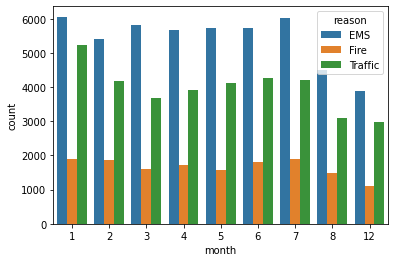

In [54]:
sns.countplot(x = "month", hue="reason", data=df)

In [55]:
df["month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

Note that the months: 9, 10, 11 are not present in the data. This means that the number of calls during these months (September, October, November) in the data we have are zero.

In [0]:
newdf = df.groupby("month").count()

In [57]:
newdf.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,hour
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Maximum number of calls in January, followed by February, March, April and May.

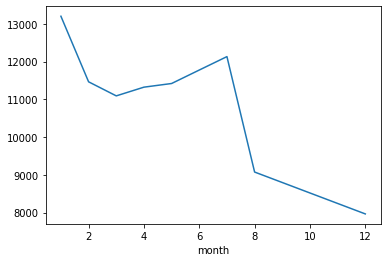

In [58]:
# Any column is fine, all have the same values since each just gives the count of the number of records that have that specific month
newdf["twp"].plot()

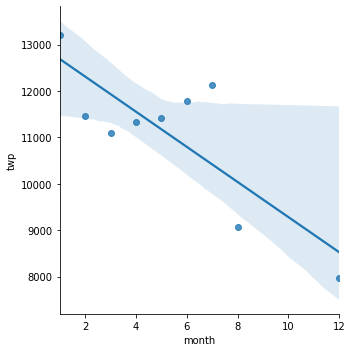

In [59]:
sns.lmplot(x='month', y='twp', data = newdf.reset_index())

In [0]:
df["date"] = df["timeStamp"].apply(lambda x: x.date())

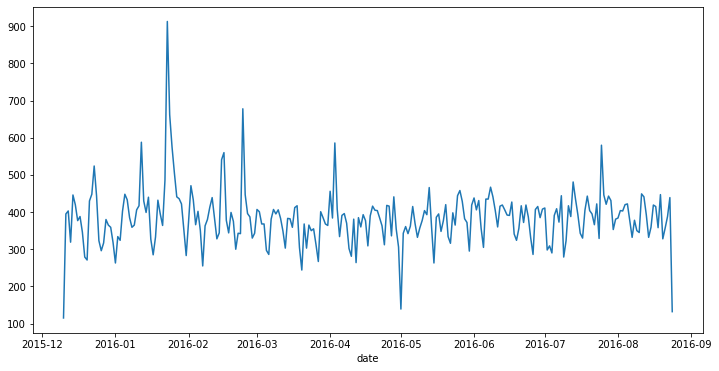

In [61]:
plt.figure(figsize = (12,6))
df.groupby("date").count()["twp"].plot.line()
# Just normal plot (line)
# plt.tight_layout()

Number of calls are maximum during mid-January, 2016

In [62]:
df[df["reason"]=="Fire"].groupby("date").count()
# Have to specify .count() i.e. which attribute you want to access in the grouped data
# .groupby just brings them together will all kinds of attributes: count, mean, sum, std, etc

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour
date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,52,52,52,47,52,52,52,52,52,52,52,52,52
2016-08-21,54,54,54,50,54,54,54,54,54,54,54,54,54
2016-08-22,51,51,51,46,51,51,50,50,51,51,51,51,51


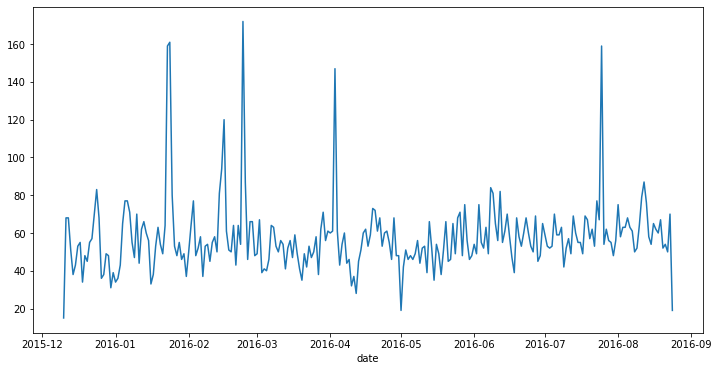

In [63]:
plt.figure(figsize = (12,6))
df[df["reason"]=="Fire"].groupby("date").count()["twp"].plot()

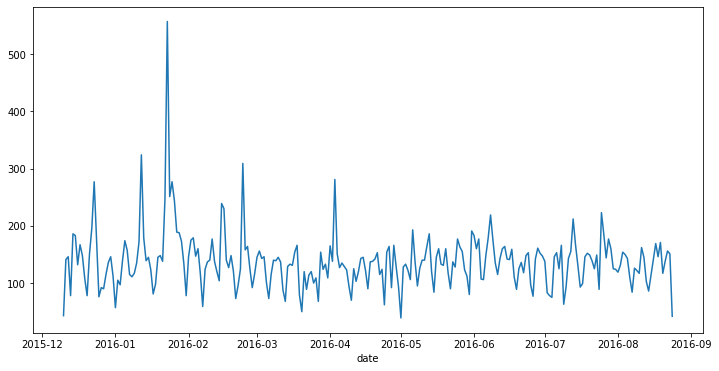

In [64]:
plt.figure(figsize = (12,6))
df[df["reason"]=="Traffic"].groupby("date").count()["twp"].plot()

Calls for traffic are very high around mid January, 2016.

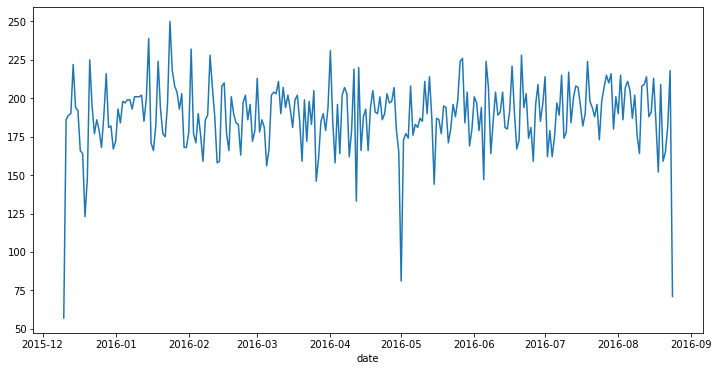

In [65]:
plt.figure(figsize = (12,6))
df[df["reason"]=="EMS"].groupby("date").count()["twp"].plot()

Calls for EMS are very high year-round falling substantially only during December 2015, May 2016 and October 2016

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17,2015-12-10


In [0]:
# df.set_index("dayOfWeek")
# not inplace

In [163]:
df.groupby(by=["dayOfWeek", "hour"]).count()

lat  lng  desc  zip  ...  reason  month  date  date-digit
dayOfWeek hour                       ...                                 
Fri       0     275  275   275  248  ...     275    275   275         275
          1     235  235   235  200  ...     235    235   235         235
          2     191  191   191  165  ...     191    191   191         191
          3     175  175   175  164  ...     175    175   175         175
          4     201  201   201  184  ...     201    201   201         201
...             ...  ...   ...  ...  ...     ...    ...   ...         ...
Wed       19    686  686   686  590  ...     686    686   686         686
          20    668  668   668  597  ...     668    668   668         668
          21    575  575   575  508  ...     575    575   575         575
          22    490  490   490  432  ...     490    490   490         490
          23    335  335   335  294  ...     335    335   335         335

[168 rows x 13 columns]

Grouped by day of week and then the result grouped by hour.

In [165]:
df.groupby(by=["dayOfWeek", "hour"]).count().loc["Fri"]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,month,date,date-digit
hour,,,,,,,,,,,,,
0,275,275,275,248,275,275,275,275,275,275,275,275,275
1,235,235,235,200,235,235,235,232,235,235,235,235,235
2,191,191,191,165,191,191,191,191,191,191,191,191,191
3,175,175,175,164,175,175,175,175,175,175,175,175,175
4,201,201,201,184,201,201,201,201,201,201,201,201,201
5,194,194,194,166,194,194,194,194,194,194,194,194,194
6,372,372,372,319,372,372,372,369,372,372,372,372,372
7,598,598,598,526,598,598,598,593,598,598,598,598,598
8,742,742,742,637,742,742,742,737,742,742,742,742,742


Note 24 values (hours) for each day!  
Keep chaining...!

In [167]:
# Choose any column since all columns have the same count now (except some which may have fewer due to NaN values)
df.groupby(by=["dayOfWeek", "hour"]).count()["reason"]

dayOfWeek  hour
Fri        0       275
           1       235
           2       191
           3       175
           4       201
                  ... 
Wed        19      686
           20      668
           21      575
           22      490
           23      335
Name: reason, Length: 168, dtype: int64

Now each of the 7 days has a value for each of the 24 hours. Thus convert hour to column header!

In [168]:
# The stack method turns column names into index values, and the unstack method turns index values into column names.
# So by shifting the values into the index, we can use stack and unstack to perform the swap.
# https://stackoverflow.com/questions/24640399/how-to-unstack-or-pivot-in-pandas

dayVSHour = df.groupby(by=["dayOfWeek", "hour"]).count()["reason"].unstack()
dayVSHour.head()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


Hence, unstack useful when 2 attributes (here used in the case of 'groupby') have values for each other. I.e. each attribute has a value for every single value of the other attribute.

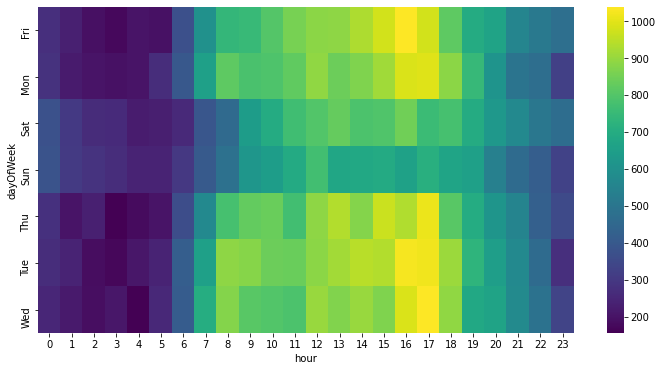

In [69]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayVSHour, cmap = 'viridis')

Basically, just transforming numbers to colours according to a scale decided by matplotlib itself.

Observations:  
*  Most emergency calls are observed to take place between 7 AM and 7 PM.  
*  The peak is observed during 17 hours (5PM). The reason "could" be that the office hours ends at 5PM, thus leading to rush hour (peak/heavy traffic period).
*  The number of calls during the early hours are extremely few, when compared to the other parts of the day.  
*  As was earlier noted, the calls are lesser during the weekends, Saturday and Sunday.

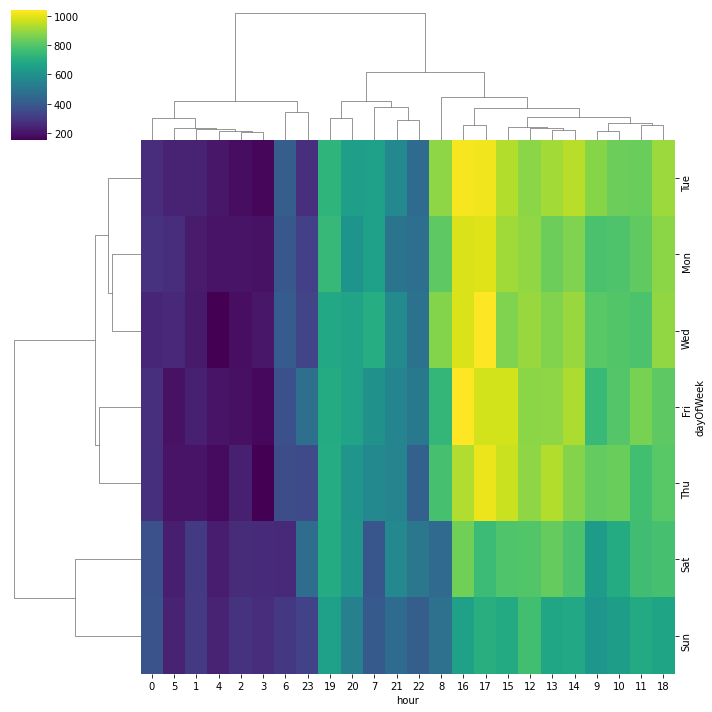

In [70]:
sns.clustermap(dayVSHour, cmap = "viridis")

In [71]:
dayVSMonth = df.groupby(by=["dayOfWeek", "month"]).count()["reason"].unstack()
dayVSMonth.head()

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


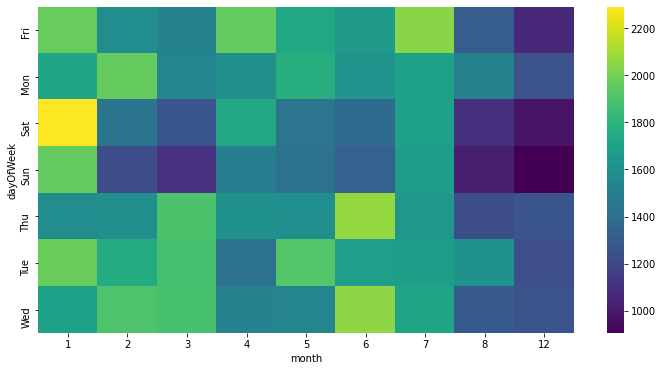

In [72]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayVSMonth, cmap = 'viridis')

**Highest cases, as observed earlier are during January. Especially during Saturday (though earlier we had noted fewer cases during weekends). What is the reason behind this? (Analysis below)**

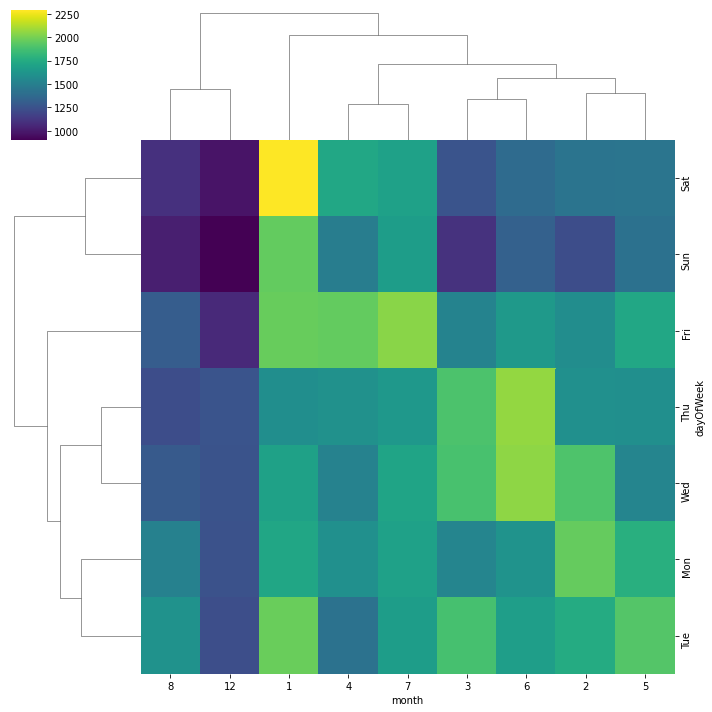

In [73]:
sns.clustermap(dayVSMonth, cmap = "viridis")

### Reason for maximum calls in January, 2016

In [74]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu,12,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu,12,17,2015-12-10


In [78]:
df["timeStamp"]

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [169]:
df[df["month"] == 1]["date"].value_counts().head(15)

2016-01-23    913
2016-01-24    662
2016-01-12    588
2016-01-25    575
2016-01-26    505
2016-01-22    486
2016-01-05    448
2016-01-27    441
2016-01-15    440
2016-01-28    436
2016-01-06    434
2016-01-19    432
2016-01-13    430
2016-01-29    422
2016-01-11    417
Name: date, dtype: int64

Note really large number of calls on the 23rd followed by 24th.

In [0]:
from datetime import datetime # not required

In [0]:
t1 = datetime.strptime('2016-Jan-23', "%Y-%b-%d") # not required
df[df[df["month"==1]["date"]==t1]]

In [0]:
def findDateDigit(x):
  return int(str(x).split("-")[2]) # Remember to convert to int!!
# All the other methods (.month, .hour) of date-time object converted result to int (saw using dtype)

In [0]:
df["date-digit"] = df["date"].apply(findDateDigit)

In [130]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date,date-digit
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Wed,8,11,2016-08-24,24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Wed,8,11,2016-08-24,24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,Wed,8,11,2016-08-24,24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,Wed,8,11,2016-08-24,24
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,Wed,8,11,2016-08-24,24


In [131]:
df["date-digit"].dtype
# earlier, before converting (forgot) to int, was dtype('O')

dtype('int64')

In [0]:
Jan23DF = df[(df["month"]==1) & (df["date-digit"]==23)]

In [136]:
Jan23DF.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek,month,hour,date,date-digit
16586,40.121497,-75.339905,; NORRISTOWN; 2016-01-23 @ 00:00:20;,NaN,Traffic: DISABLED VEHICLE -,2016-01-23 00:02:00,NORRISTOWN,NaN,1,Traffic,Sat,1,0,2016-01-23,23
16587,40.129538,-75.324636,E JOHNSON HWY & DEKALB PIKE; EAST NORRITON; 20...,19401.0,Traffic: DISABLED VEHICLE -,2016-01-23 00:07:00,EAST NORRITON,E JOHNSON HWY & DEKALB PIKE,1,Traffic,Sat,1,0,2016-01-23,23
16588,40.161740,-75.123821,EASTON RD & MARYLAND RD; UPPER MORELAND; 2016-...,19090.0,Traffic: DISABLED VEHICLE -,2016-01-23 00:07:01,UPPER MORELAND,EASTON RD & MARYLAND RD,1,Traffic,Sat,1,0,2016-01-23,23
16589,40.191353,-75.454847,MAIN CAMPUS DR & E 5TH AVE; COLLEGEVILLE; Sta...,19426.0,EMS: OVERDOSE,2016-01-23 00:12:01,COLLEGEVILLE,MAIN CAMPUS DR & E 5TH AVE,1,EMS,Sat,1,0,2016-01-23,23
16590,40.087617,-75.261961,RIDGE PIKE & MULBERRY LN; WHITEMARSH; 2016-01-...,19444.0,Traffic: DISABLED VEHICLE -,2016-01-23 00:12:01,WHITEMARSH,RIDGE PIKE & MULBERRY LN,1,Traffic,Sat,1,0,2016-01-23,23


In [141]:
Jan23DF["twp"].value_counts().head(5)

NORRISTOWN      61
LOWER MERION    56
ABINGTON        52
UPPER MERION    49
HORSHAM         49
Name: twp, dtype: int64

**All these townships are located in Pennsylvania, US (PA)**

In [140]:
Jan23DF["reason"].value_counts()

Traffic    557
EMS        197
Fire       159
Name: reason, dtype: int64

In [149]:
Jan23DF["hour"].value_counts().head(7)

16    74
17    61
11    54
18    53
15    52
7     51
19    48
Name: hour, dtype: int64

*  Most of the traffic observed during the January of 2016 is mostly on the 23rd and 24th.
*  Highest cases are related to traffic during this time.
*  The time at which the maximum calls are observed is: 3 to 7 PM

In [145]:
Jan23DF["desc"].iloc[3]

'MAIN CAMPUS DR & E 5TH AVE;  COLLEGEVILLE; Station 324; 2016-01-23 @ 00:06:58;'

**From all the above observations, and a bit of research as to what happened on the 23 and 24th of January 2016 in Pennsylvania, I found these two articles:**  
**1.  https://edition.cnn.com/2016/01/23/us/kentucky-i75-snow-stranded-motorists/index.html**  
**2.  https://www.post-gazette.com/local/2016/01/23/Snow-slowing-down-but-roads-remain-difficult-to-travel/stories/201601230116**  
**where extremely bad weather and storms were cited as the reason for the unusual surge in the number of calls on these 2 days.**